# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [127]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [131]:
from sklearn.model_selection import train_test_split

Y = df['price']
X = df['bathrooms']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(21613,) 

(10806,)
(10807,)
(10806,)
(10807,)


493      2.50
4253     3.25
18621    3.50
1463     1.00
12026    1.75
Name: bathrooms, dtype: float64

In [132]:
X_test = X_test.values.reshape(-1, 1)
X_train = X_train.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_[0])
print("\n Intercept: ", model.intercept_)

Coefficient: 
 240296.98668777454

 Intercept:  28306.06679287704


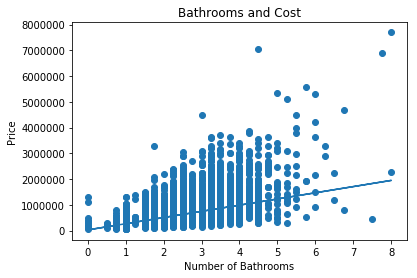

In [133]:
m_hat = model.coef_[0]
b_hat = model.intercept_

plt.scatter(X, Y)
y_hat = [m_hat * x + b_hat for x in X]
plt.plot(X, y_hat)

plt.ylabel("Price")
plt.xlabel("Number of Bathrooms")
plt.title("Bathrooms and Cost")
plt.show()

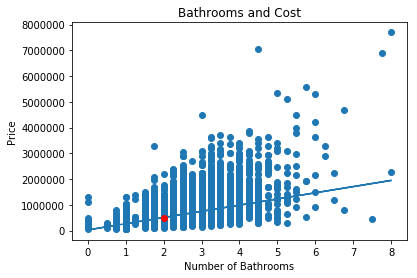

In [134]:
# Make a single prediction for 70 degrees farenheit
x_value = 2

# Plug our temperature into our equation (model)
prediction = m_hat * x_value + b_hat
# print("Prediction", y_hat)

# Plot the points
plt.scatter(X, Y)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Number of Bathrooms")
plt.title("Bathrooms and Cost")
plt.show()

In [135]:
y_test_predict = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(Y_test, y_test_predict))

R2 = r2_score(Y_test, y_test_predict)

print('RMSE is {}'.format(RMSE))

print('R2 is {}'.format(R2))

RMSE is 329133.1799664924
R2 is 0.27272892874918386


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [136]:
df_copy = df.filter(['price', 'bedrooms', 'bathrooms'])
df_copy.head()

,price,bedrooms,bathrooms
0,221900.0,3,1.00
1,538000.0,3,2.25
2,180000.0,2,1.00
3,604000.0,4,3.00
4,510000.0,3,2.00


In [137]:
# The Scikit-Learn code is the same every time.
Y1 = df_copy.loc[:, ['price']].values
X1 = df_copy.loc[:, ['bedrooms','bathrooms']].values

print(Y1.shape)
print(X1.shape)

(21613, 1)
(21613, 2)


In [138]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.5, random_state = 42)

print(X1.shape, "\n")

print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(21613, 2) 

(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)


In [139]:
model = LinearRegression()
model.fit(X1, Y1)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [ 20138.26578118 237780.5850233 ]

Intercept Value:  [-30642.99594889]


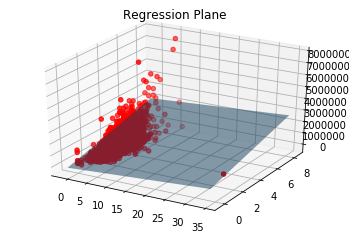

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['bedrooms'], df['bathrooms'], df['price'], c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt.title("Regression Plane")

plt.show()

In [142]:
y_test_predict = model.predict(X1_test)

RMSE = np.sqrt(mean_squared_error(Y1_test, y_test_predict))

R2 = r2_score(Y1_test, y_test_predict)

print('RMSE is {}'.format(RMSE))

print('R2 is {}'.format(R2))

RMSE is 328304.4560987068
R2 is 0.2763867071465458


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [158]:
# The Scikit-Learn code is the same every time.
new_df = df.copy()
new_df.head()
Y2 = new_df['price']
X2 = new_df.drop(['price', 'date'], axis = 1)

print(Y2.shape)
print(X2.shape)

(21613,)
(21613, 19)


In [160]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.5, random_state = 42)

print(X2.shape, "\n")

print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(21613, 19) 

(10806, 19)
(10807, 19)
(10806,)
(10807,)


In [161]:
model = LinearRegression()
model.fit(X2, Y2)

beta_2 = model.intercept_
beta_3 = model.coef_[0]

print("Slope Coefficients: ", beta_3)
print("\nIntercept Value: ", beta_2)

Slope Coefficients:  -1.2887026742663847e-06

Intercept Value:  6938891.719974928


In [163]:
y_test_predict = model.predict(X2_test)

RMSE = np.sqrt(mean_squared_error(Y2_test, y_test_predict))

R2 = r2_score(Y2_test, y_test_predict)

print('RMSE is {}'.format(RMSE))

print('R2 is {}'.format(R2))

RMSE is 214576.86199718955
R2 is 0.6908859388239821


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
